In [2]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2.19.0
Num GPUs Available: 1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
# import zipfile

# zip_ref = zipfile.ZipFile("archive.zip")
# zip_ref.extractall()
# zip_ref.close

In [4]:
train_dir = "dog_breed_data/train"
val_dir = "dog_breed_data/val"
test_dir = "dog_breed_data/test"

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

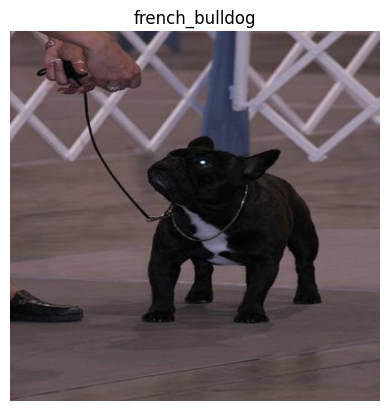

In [5]:
import os
import random
class_names = sorted(os.listdir(train_dir))
random_img_label = random.choice(class_names)
random_img_path = f"{train_dir}/{random_img_label}"
random_img = random.choice(os.listdir(random_img_path))
img = plt.imread(f"{random_img_path}/{random_img}")
plt.imshow(img)
plt.title(random_img_label)
plt.axis(False)



In [6]:
import cv2

def bluring_img(img):
    blur_img = cv2.GaussianBlur(img,(3,3),0)
    return blur_img

def sharpning_img(img):
    sharp_kernel = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
    sharp_img = cv2.filter2D(img,-1,sharp_kernel)
    sharp_img = np.clip(sharp_img,0,255).astype(np.uint8)
    return sharp_img

datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=sharpning_img)

train_data = datagen.flow_from_directory(train_dir,
                                         target_size = (384,384),
                                         class_mode='categorical')
val_data = datagen.flow_from_directory(val_dir,
                                       target_size = (384,384),
                                       class_mode = 'categorical')

Found 8177 images belonging to 120 classes.
Found 1276 images belonging to 120 classes.


In [7]:
sharp_test_data = datagen.flow_from_directory(test_dir,
                                        target_size = (384,384),
                                        class_mode = 'categorical')

blur_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=bluring_img)

blur_test_data = blur_datagen.flow_from_directory(test_dir,
                                                 target_size = (384,384),
                                                 class_mode = 'categorical')

normal_test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
            image_size =(384,384),
            label_mode = 'categorical')




Found 769 images belonging to 120 classes.
Found 769 images belonging to 120 classes.
Found 769 files belonging to 120 classes.


I0000 00:00:1746714841.557324    2026 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


(384, 384, 3)


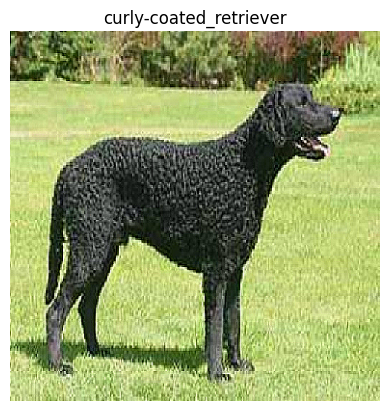

In [8]:
for image,label in train_data:
    plt.imshow(image[0]/255)
    plt.title(class_names[np.argmax(label[0])])
    plt.axis(False)
    print(image[0].shape)
    break

In [9]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
                  layers.RandomFlip('horizontal'),
                  layers.RandomZoom(0.2),
                  layers.RandomRotation(0.2),
                  ])


In [27]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(384,384,3))
x  = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(120,activation='softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [28]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [29]:
chkpt_dir = "Model_chpkpt/first_chkpt.weights.h5"
model_check = tf.keras.callbacks.ModelCheckpoint(chkpt_dir,
                                                 save_best_only = True,
                                                 save_weights_only = True)

In [31]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        validation_data = val_data,
                        callbacks = [model_check])

Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5033 - loss: 2.8044

2025-05-07 13:43:23.124153: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 772.21MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-07 13:43:23.161125: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-07 13:43:26.521209: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-07 13:44:05.280141: W external/local_xla/xla/

256/256 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.5039 - loss: 2.8007 - val_accuracy: 0.8644 - val_loss: 0.6172
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.8265 - loss: 0.7429 - val_accuracy: 0.8762 - val_loss: 0.4226
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.8401 - loss: 0.5774 - val_accuracy: 0.8809 - val_loss: 0.3700
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.8693 - loss: 0.4679 - val_accuracy: 0.8926 - val_loss: 0.3490
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8876 - loss: 0.3991 - val_accuracy: 0.8879 - val_loss: 0.3446


In [40]:
# temp_model_1 = model_1
normal_data_result = model_1.evaluate(normal_test_data)
normal_data_result

25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9351 - loss: 0.2336


[0.2471648007631302, 0.9297789335250854]

In [39]:
blur_data_result = model_1.evaluate(blur_test_data)
blur_data_result

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8808 - loss: 0.3818


[0.33310651779174805, 0.9011703729629517]

In [36]:
sharp_data_result = model_1.evaluate(sharp_test_data)
sharp_data_result

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 893ms/step - accuracy: 0.8814 - loss: 0.3695


[0.3401862680912018, 0.8907672166824341]

In [ ]:
# model_1.save("model_1.keras")

In [ ]:
# test_model = tf.keras.models.load_model("model_1.keras")
# test_model.evaluate(test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 874ms/step - accuracy: 0.9339 - loss: 0.2496


[0.24250033497810364, 0.9362809062004089]

In [41]:
base_model.trainable = True
base_model.layers

[<InputLayer name=input_layer_3, built=True>,
 <Rescaling name=rescaling_2, built=True>,
 <Normalization name=normalization_1, built=True>,
 <Rescaling name=rescaling_3, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=

In [42]:
for layers in base_model.layers[:-5]:
    layers.trainable = False


In [43]:
for layer in base_model.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")

Layer: input_layer_3, Trainable: False
Layer: rescaling_2, Trainable: False
Layer: normalization_1, Trainable: False
Layer: rescaling_3, Trainable: False
Layer: stem_conv_pad, Trainable: False
Layer: stem_conv, Trainable: False
Layer: stem_bn, Trainable: False
Layer: stem_activation, Trainable: False
Layer: block1a_dwconv, Trainable: False
Layer: block1a_bn, Trainable: False
Layer: block1a_activation, Trainable: False
Layer: block1a_se_squeeze, Trainable: False
Layer: block1a_se_reshape, Trainable: False
Layer: block1a_se_reduce, Trainable: False
Layer: block1a_se_expand, Trainable: False
Layer: block1a_se_excite, Trainable: False
Layer: block1a_project_conv, Trainable: False
Layer: block1a_project_bn, Trainable: False
Layer: block1b_dwconv, Trainable: False
Layer: block1b_bn, Trainable: False
Layer: block1b_activation, Trainable: False
Layer: block1b_se_squeeze, Trainable: False
Layer: block1b_se_reshape, Trainable: False
Layer: block1b_se_reduce, Trainable: False
Layer: block1b_se_ex

In [44]:
temp_model_1 = model_1

In [50]:
temp_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.AdamW(0.0001),
                     metrics = ["Accuracy"])

In [51]:
temp_model_1.fit(train_data,
            epochs = 10,
            initial_epoch = history_1.epoch[-1],
            validation_data = val_data,)

Epoch 5/10


E0000 00:00:1746633795.257672     732 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


256/256 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - Accuracy: 0.9256 - loss: 0.2756 - val_Accuracy: 0.8903 - val_loss: 0.3235
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - Accuracy: 0.9398 - loss: 0.2306 - val_Accuracy: 0.8871 - val_loss: 0.3224
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - Accuracy: 0.9398 - loss: 0.2282 - val_Accuracy: 0.8832 - val_loss: 0.3227
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - Accuracy: 0.9480 - loss: 0.2141 - val_Accuracy: 0.8887 - val_loss: 0.3286
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - Accuracy: 0.9489 - loss: 0.2065 - val_Accuracy: 0.8871 - val_loss: 0.3241
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - Accuracy: 0.9413 - loss: 0.2146 - val_Accuracy: 0.8895 - val_loss: 0.3262


In [55]:
temp_model_1.evaluate(normal_test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - Accuracy: 0.9428 - loss: 0.2062


[0.23467375338077545, 0.9323797225952148]

In [53]:
temp_model_1.evaluate(sharp_test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - Accuracy: 0.8937 - loss: 0.3346


[0.3367908000946045, 0.881664514541626]

In [54]:
temp_model_1.evaluate(blur_test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 865ms/step - Accuracy: 0.9045 - loss: 0.3109


[0.32310083508491516, 0.8985695838928223]

In [56]:
temp_model_1.save("model_1_1.keras")

In [8]:
test_model_1 = tf.keras.models.load_model("model_1.keras")
test_model_2 = tf.keras.models.load_model("model_1_1.keras")

I0000 00:00:1746672232.781284     586 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [58]:
test_model_1.evaluate(normal_test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 869ms/step - accuracy: 0.9409 - loss: 0.2196


[0.24250034987926483, 0.9362809062004089]

In [59]:
test_model_2.evaluate(normal_test_data)

25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - Accuracy: 0.9494 - loss: 0.2170


[0.23467372357845306, 0.9323797225952148]

In [41]:
from PIL import Image
import numpy as np

img = Image.open("dog.jpg").resize((384,384))
img = np.array(img)
img = np.expand_dims(img,axis=0)
# plt.axis(False)
# plt.imshow(img)


In [42]:
pred_1 = test_model_1.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [43]:
pred_2 = test_model_2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [49]:
np.argmax(pred_1)

np.int64(86)

In [55]:
pred_1[0][86]

np.float32(0.94121575)